### introduction
#### Supply chain analytics is a valuable part of data-driven decision-making in various industries such as manufacturing, retail, healthcare, and logistics. It is the process of collecting, analyzing and interpreting data related to the movement of products and services from suppliers to customers.
#### Here is a dataset we collected from a Fashion and Beauty startup. The dataset is based on the supply chain of Makeup products.

### business problem : 
#### Our task is to perform Supply Chain Analysis to find data-driven approaches to optimize the supply chain performance and improve customer satisfaction while reducing costs and maximizing profits for all stakeholders involved.

### importing packages and data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Let's have a look at the data using df.head() and df.tail() function.

In [3]:
df = pd.read_csv(r"D:\supply_chain_EDA\supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [5]:
df.shape

(100, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

### Data Cleaning
#### Before we start with the analysis, we must first clean the data or “scrub the dirt”. 
#### For this analysis, we will look at the more common issues such as missing and duplicate data.
#### Handling Missing Values

In [5]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

#### The result shows that the data set does not have any null value.

#### Duplicate Data
#### Then, we will find out whether there is duplicate data.

In [6]:
df.duplicated().sum()

0

#### The result also shows that the data set does not have any duplicate value.

#### Here, we will do a descriptive statistical analysis.

In [7]:
df.describe().round(2)

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,49.46,48.40,460.99,5776.05,47.77,15.96,49.22,5.75,5.55,17.08,567.84,14.77,47.27,2.28,529.25
std,31.17,30.74,303.78,2732.84,31.37,8.79,26.78,2.72,2.65,8.85,263.05,8.91,28.98,1.46,258.30
min,1.70,1.00,8.00,1061.62,0.00,1.00,1.00,1.00,1.01,1.00,104.00,1.00,1.09,0.02,103.92
25%,19.60,22.75,184.25,2812.85,16.75,8.00,26.00,3.75,3.54,10.00,352.00,7.00,22.98,1.01,318.78
50%,51.24,43.50,392.50,6006.35,47.50,17.00,52.00,6.00,5.32,18.00,568.50,14.00,45.91,2.14,520.43
75%,77.20,75.00,704.25,8253.98,73.00,24.00,71.25,8.00,7.60,25.00,797.00,23.00,68.62,3.56,763.08
max,99.17,100.00,996.00,9866.47,100.00,30.00,96.00,10.00,9.93,30.00,985.00,30.00,99.47,4.94,997.41


#### let's explore a sample of the dataset

In [10]:
df.sample(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
55,haircare,SKU55,79.855058,16,701,2925.675170,Male,97,11,11,...,Delhi,27,918,5,30.323545,Fail,4.548920,Sea,Route B,323.012928
62,cosmetics,SKU62,72.796354,89,270,3899.746834,Unknown,86,2,40,...,Mumbai,13,751,14,21.048643,Pass,1.874001,Sea,Route C,320.846516
13,skincare,SKU13,16.160393,5,249,4052.738416,Male,80,8,48,...,Bangalore,23,173,10,97.829050,Pending,1.631074,Road,Route B,547.241005
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,Chennai,21,824,20,35.633652,Fail,4.165782,Air,Route A,823.523846
41,skincare,SKU41,99.113292,35,556,5521.205259,Female,64,19,38,...,Chennai,18,892,7,95.332065,Fail,0.045302,Sea,Route A,275.524371
51,haircare,SKU51,26.700761,61,154,9866.465458,Male,100,4,52,...,Bangalore,18,673,28,14.190328,Pending,1.772951,Road,Route A,694.982318
81,haircare,SKU81,72.819207,9,774,4384.413400,Unknown,48,6,8,...,Delhi,28,698,1,19.789593,Pending,2.547547,Rail,Route B,276.778336
26,haircare,SKU26,97.446947,9,353,3716.493326,Male,59,16,48,...,Bangalore,26,171,4,15.972230,Pass,2.119320,Rail,Route A,617.866916
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312


#### now we may have to minimize our dataset to the columns we will only use

In [4]:
df =df[['Product type', 'SKU', 'Price',
       'Number of products sold', 'Revenue generated',
       'Stock levels','Order quantities', 
       'Shipping carriers', 'Shipping costs','Location',
       'Defect rates',
       'Transportation modes','Costs']]

In [5]:
df.head()

,Product type,SKU,Price,Number of products sold,Revenue generated,Stock levels,Order quantities,Shipping carriers,Shipping costs,Location,Defect rates,Transportation modes,Costs
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632


#### we have to rename some columns to make the dataset more suitable

In [6]:
df.rename(columns={'Costs':'Cost','Shipping costs':'Shipping cost','Revenue generated':'Revenue','Defect rates':'Defect rate','Transportation modes':'Transportation mode'},inplace=True)

In [7]:
df.rename(columns={'Number of products sold':'Quantity sold'},inplace=True)

In [15]:
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632


#### let's discover if there are correlations between our variables

In [16]:
df_corr = df[['Price','Revenue','Defect rate']].corr().round(2)
df_corr

,Price,Revenue,Defect rate
Price,1.00,0.04,-0.15
Revenue,0.04,1.00,-0.13
Defect rate,-0.15,-0.13,1.00


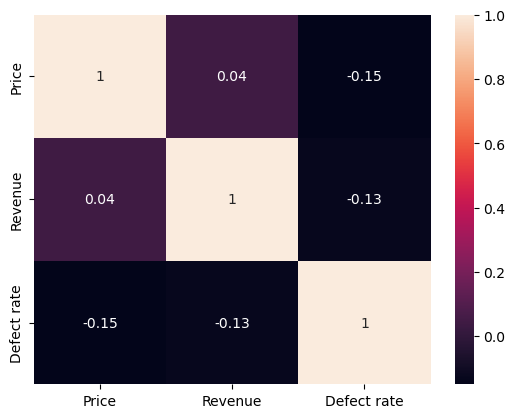

In [39]:
sns.heatmap(df_corr,annot=True);

In [17]:
df['Revenue'].unique()

array([8661.99679239, 7460.90006545, 9577.74962587, 7766.83642569,
       2686.50515157, 2828.34874598, 7823.47655953, 8496.10381309,
       7517.36321063, 4971.14598759, 2330.96580209, 6099.94411558,
       2873.74144602, 4052.73841624, 8653.57092647, 5442.0867854 ,
       6453.79796818, 2629.39643485, 9364.67350508, 2553.49558499,
       8128.02769685, 7087.05269636, 2390.80786656, 8858.36757101,
       9049.07786094, 2174.77705435, 3716.49332589, 2686.45722358,
       6117.32461508, 8318.90319462, 2766.34236687, 9655.13510272,
       9571.55048733, 5149.99835041, 9061.71089551, 6541.3293448 ,
       7573.40245785, 2438.33993047, 9692.31804022, 1912.4656631 ,
       5724.95935046, 5521.20525901, 1839.60942586, 5737.42559912,
       7152.28604944, 5267.95680751, 2556.76736063, 7089.47424993,
       7397.07100459, 8001.61320652, 5910.88538967, 9866.46545798,
       9435.76260891, 8232.33482943, 6088.02147994, 2925.6751703 ,
       4767.02048434, 1605.86690039, 2021.14981034, 1061.61852

### observation
#### we see a positive corr between price and revenue, while a negative corr between defect rate and revenue/price as it prevent the business from going high

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


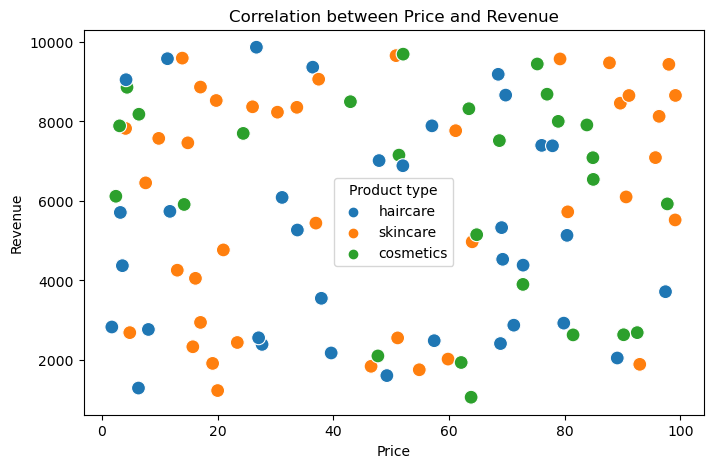

In [18]:
plt.figure(figsize=(8,5))
plt.title('Correlation between Price and Revenue')
plt.legend(loc='lower right')
sns.scatterplot(df,x='Price',y='Revenue',hue='Product type',s=100);

### observation
#### we see that skin care products are top for revenue whilst it's top for price

In [51]:
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632


### who is the product with most revenues?

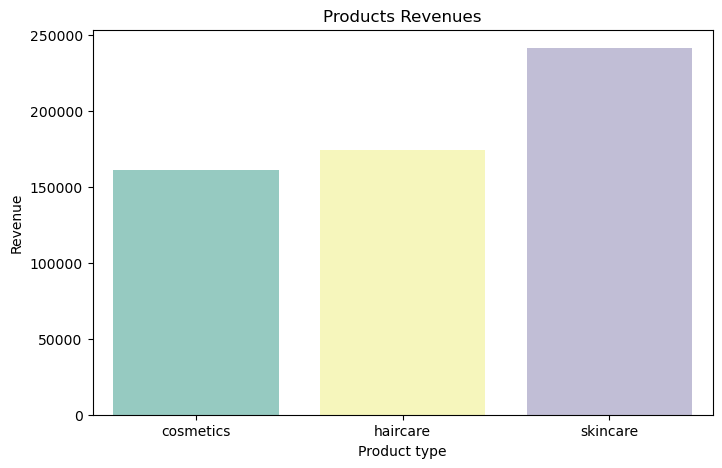

In [19]:
plt.figure(figsize=(8,5))
plt.title('Products Revenues')
products_revenue = df.groupby('Product type')['Revenue'].sum().reset_index()
sns.barplot(x=products_revenue['Product type'],y=products_revenue['Revenue'],palette='Set3');

### observation
#### skincare products are top for revenues
#### haircare products came second
#### third is cosmetics products

### let's explore products price

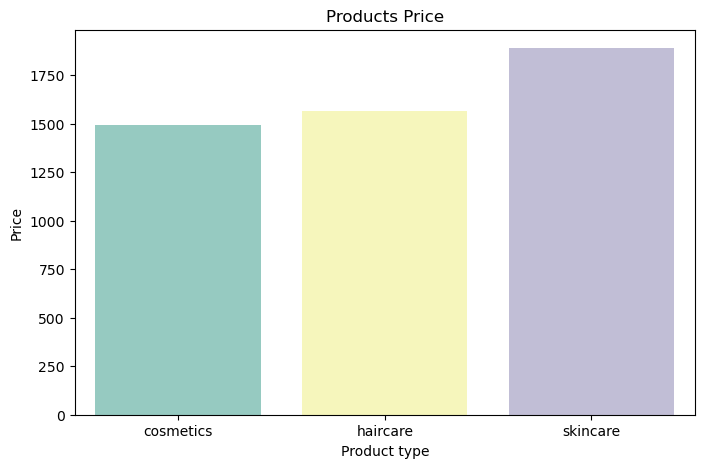

In [41]:
plt.figure(figsize=(8,5))
plt.title('Products Price')
products_revenue = df.groupby('Product type')['Price'].sum().reset_index()
sns.barplot(x=products_revenue['Product type'],y=products_revenue['Price'],palette='Set3');

### observation
#### skincare products are the most expensive products
#### haircare products came second for price
#### third is cosmetics products
#### no wonder skincare products got us the most revenues

### what SKU refers to ?
#### SKUs help vendors determine which products require reordering and provide sales data.
#### SKU refers to A stock-keeping unit, A  (SKU) is a scannable code to help vendors automatically track the movement of inventory

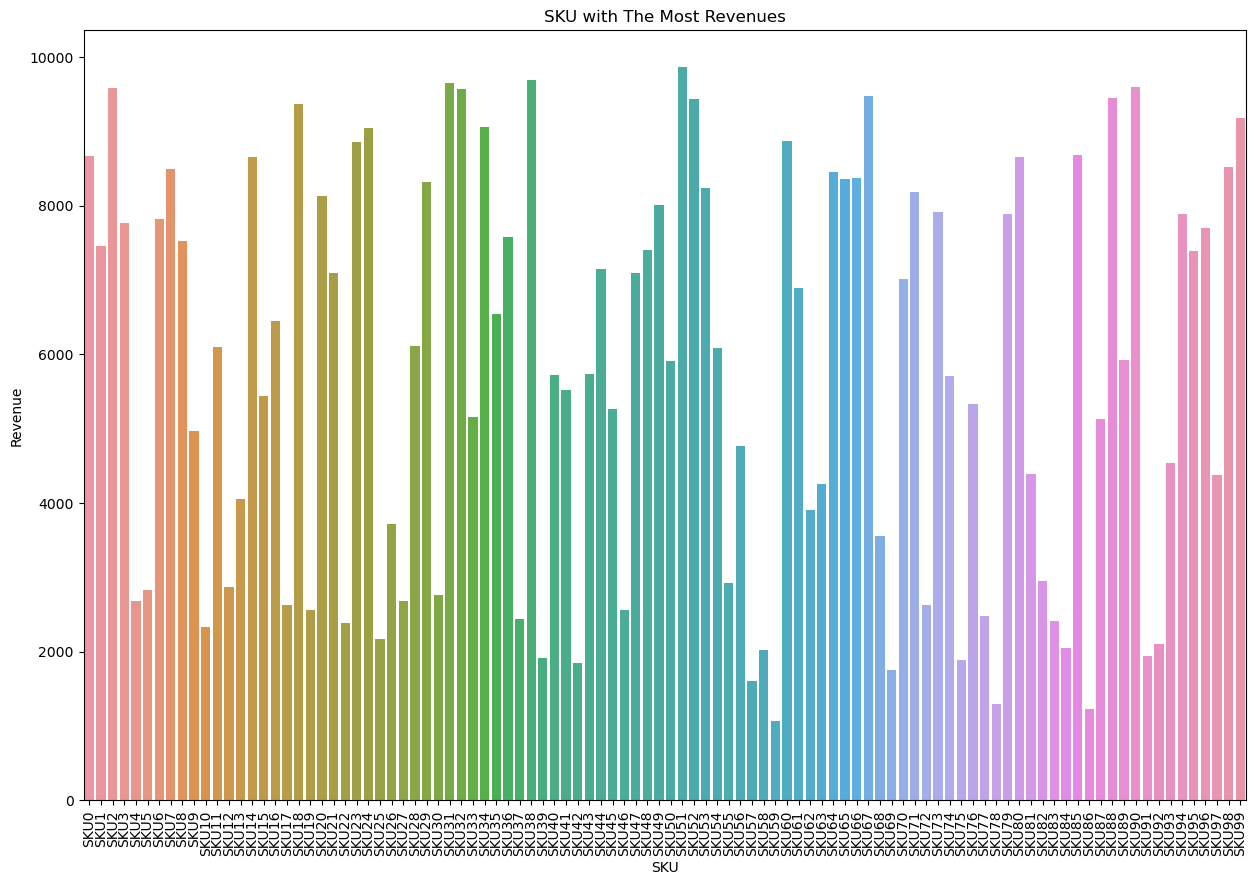

In [22]:
plt.figure(figsize=(15,10))
plt.title('SKU with The Most Revenues')
plt.xticks(rotation=90)
sns.barplot(data=df,x='SKU',y='Revenue');

#### SKU51 is the product with the top revenue among all,it's a haircare product.

### let's discover who is the SKU with the most stock levels?

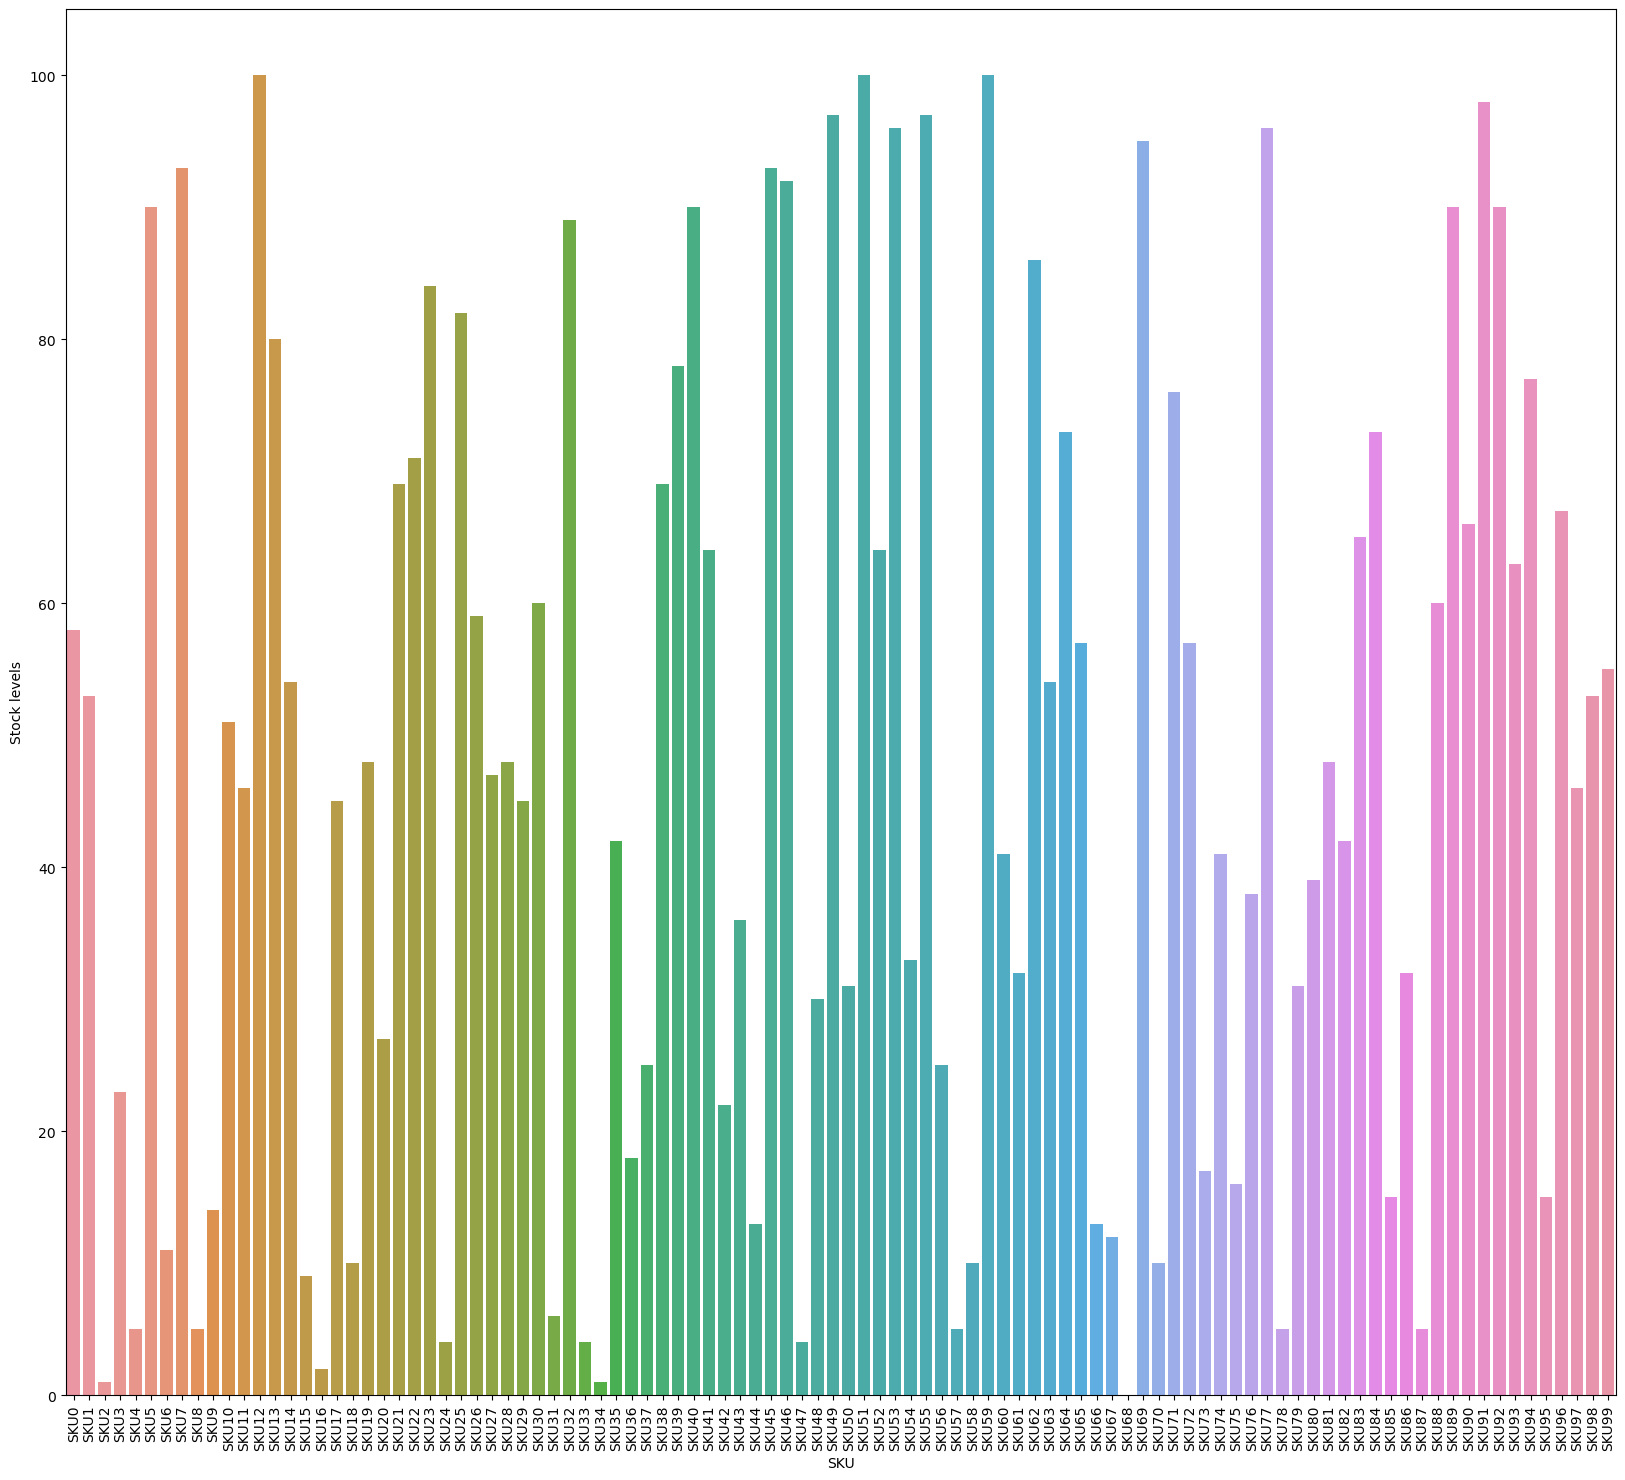

In [77]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=df,x='SKU',y='Stock levels');

#### SKU12 is the product with the top for stock levels among all with 100 product,it's a haircare product also

In [67]:
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632


### let's explore shipping carrier 

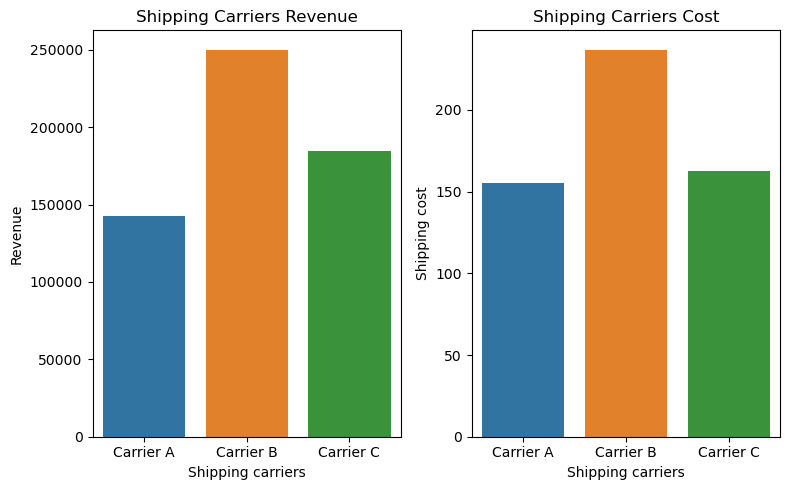

In [42]:
shipping_carrier_revenues = df.groupby('Shipping carriers')['Revenue'].sum().reset_index()
shipping_carrier_cost = df.groupby('Shipping carriers')['Shipping cost'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Shipping Carriers Revenue')
sns.barplot(x=shipping_carrier_revenues['Shipping carriers'],y=shipping_carrier_revenues['Revenue'])

plt.subplot(1,2,2)
plt.title('Shipping Carriers Cost')
sns.barplot(x=shipping_carrier_cost['Shipping carriers'],y=shipping_carrier_cost['Shipping cost'])
plt.tight_layout()
plt.show()

### observation
#### carrier B is top for cost and also for revenues with 237 for shipping cost and 250095 for revenue
#### carrier C is second for cost and revenues with 162 for shipping cost and 184880 for revenue
#### carrier A is third for cost and revenues with 156 for shipping cost and 142630.0 for revenue

In [76]:
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632


### we want to discover the most sold products

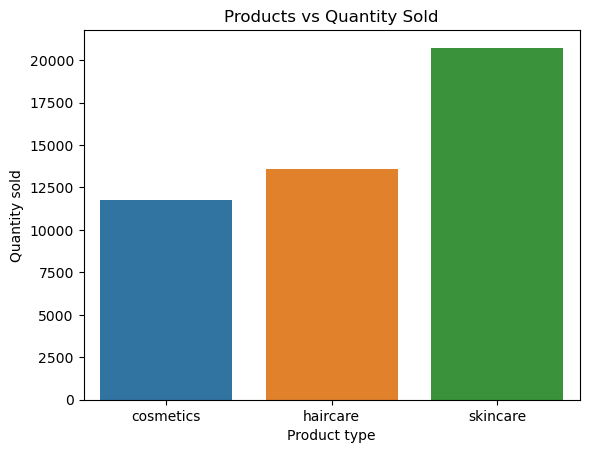

In [28]:
product_type_sales = df.groupby('Product type')['Quantity sold'].sum().reset_index()
plt.title('Products vs Quantity Sold')
sns.barplot(x=product_type_sales['Product type'],y=product_type_sales['Quantity sold']);

In [19]:
product_type_sales = df.groupby('Product type')['Quantity sold'].sum().reset_index()
product_type_sales

,Product type,Quantity sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


### observation
#### skin care products are also top for sales with 20731
#### haircare is second for sales with 13611
#### cosmetics is third for sales with 11757

### what is the transportation mode with the most revenues?

In [18]:
Transportation_mode_rev = df.groupby('Transportation mode')['Revenue'].sum().reset_index().round()
Transportation_mode_rev

,Transportation mode,Revenue
0,Air,155735.0
1,Rail,164990.0
2,Road,159315.0
3,Sea,97564.0


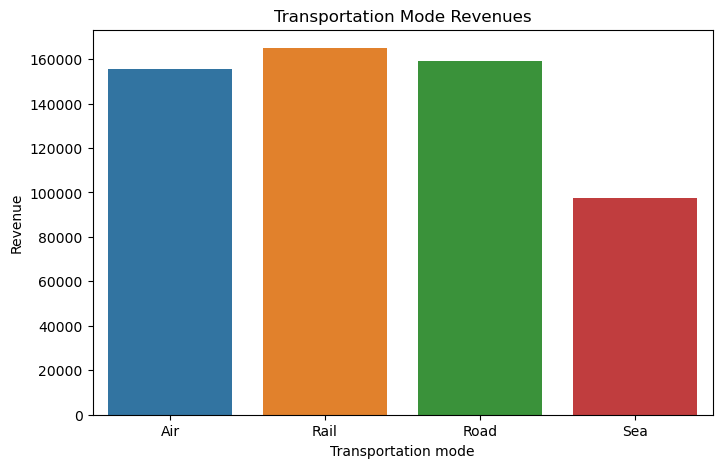

In [9]:
plt.figure(figsize=(8,5))
plt.title('Transportation Mode Revenues')
sns.barplot(x=Transportation_mode_rev['Transportation mode'],y=Transportation_mode_rev['Revenue']);

### observation
#### Rail way, road way and airway all have similar numbers in terms of revenues, with railway is slightly better with 164990
#### road way is second for revenues with 159315
#### air way is third for reveneus with 155735
#### while sea way provides the least revenues with 97564, it's obvious that it wasn't a prefered method

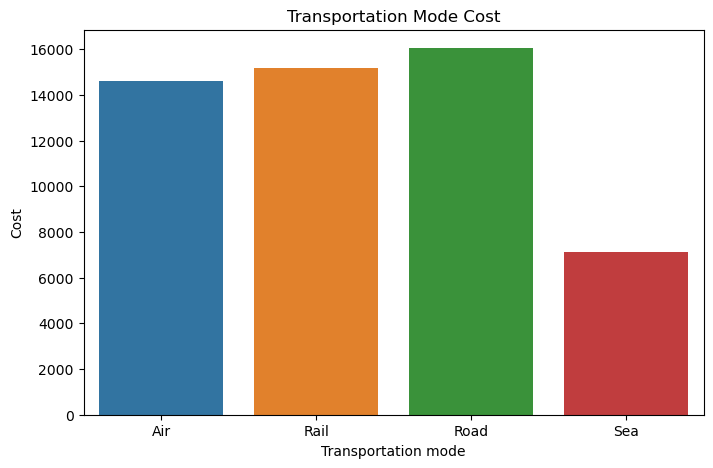

In [10]:
plt.figure(figsize=(8,5))
plt.title('Transportation Mode Cost')
Transportation_mode_cost = df.groupby('Transportation mode')['Cost'].sum().reset_index()
sns.barplot(x=Transportation_mode_cost['Transportation mode'],y=Transportation_mode_cost['Cost']);

In [17]:
Transportation_mode_cost = df.groupby('Transportation mode')['Cost'].sum().reset_index().round()
Transportation_mode_cost

,Transportation mode,Cost
0,Air,14605.0
1,Rail,15169.0
2,Road,16048.0
3,Sea,7103.0


### observation
#### Rail way, road way and airway all have similar numbers in terms of Cost, with road way is slightly better with 16048
#### rail way is second for cost with 15169
#### air way is third for cost 14605
#### while sea way is the least for cost with 7103

### who is the product with the most defect rate?

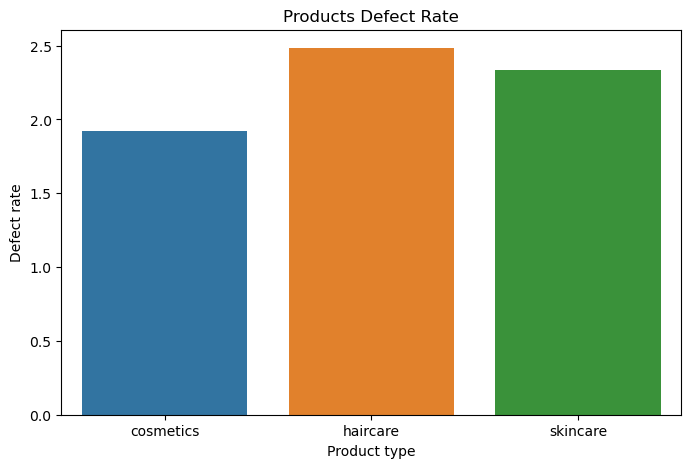

In [11]:
plt.figure(figsize=(8,5))
plt.title('Products Defect Rate')
products_defect_rate = df.groupby('Product type')['Defect rate'].mean().reset_index()
sns.barplot(x=products_defect_rate['Product type'],y=products_defect_rate['Defect rate']);

In [16]:
products_defect_rate = df.groupby('Product type')['Defect rate'].mean().reset_index().round(2)
products_defect_rate

,Product type,Defect rate
0,cosmetics,1.92
1,haircare,2.48
2,skincare,2.33


### observation
#### haircare, skincare all have similar numbers in terms of defect rate, with haircare is slightly better with 2.48
#### skincare is second for defect rate with 2.33
#### cosmetics is third for defect rate with 1.92 

### which transportation mode has the most defect rate?

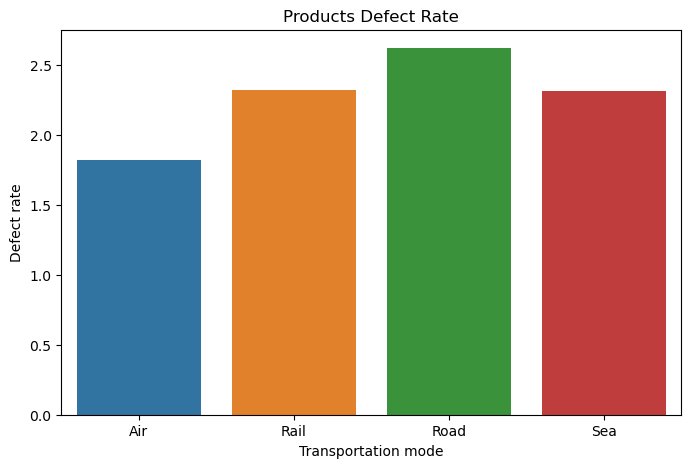

In [12]:
plt.figure(figsize=(8,5))
plt.title('Products Defect Rate')
transportation_defect_rate = df.groupby('Transportation mode')['Defect rate'].mean().reset_index()
sns.barplot(x=transportation_defect_rate['Transportation mode'],y=transportation_defect_rate['Defect rate']);

### observation
#### Rail way, road way and sea way all have similar numbers in terms of Cost with 2.32,2.62,2.32 in that order with road way is slightly better with 2.62
#### rail way is second for defect rate with 2.32 
#### sea way is also second for 2.32
#### while airway is the least for for defect rate with 1.82
#### we may have to consider the air way better if we want to decrease our defect rate

In [14]:
transportation_defect_rate = df.groupby('Transportation mode')['Defect rate'].mean().reset_index().round(2)
transportation_defect_rate

,Transportation mode,Defect rate
0,Air,1.82
1,Rail,2.32
2,Road,2.62
3,Sea,2.32


In [88]:
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632


In [23]:
df['ROI'] = df['Revenue']/ df['Cost']
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost,ROI
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075,46.135292
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579,14.830870
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282,67.486828
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159,30.484942
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632,2.909234


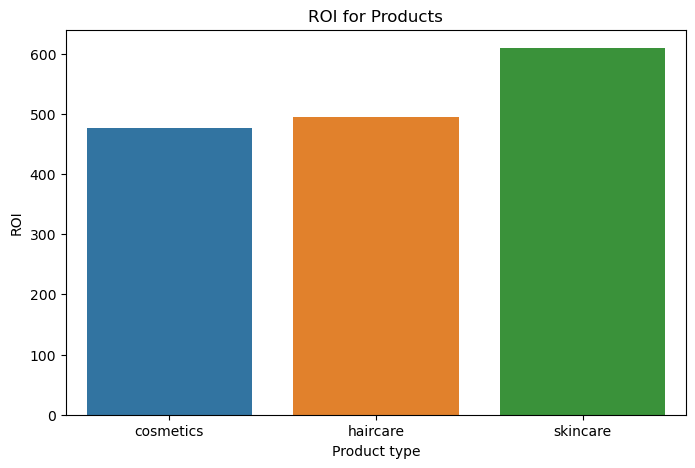

In [24]:
plt.figure(figsize=(8,5))
plt.title('ROI for Products')
products_roi = df.groupby('Product type')['ROI'].sum().reset_index()
sns.barplot(x=products_roi['Product type'],y=products_roi['ROI']);

In [26]:
products_roi = df.groupby('Product type')['ROI'].sum().reset_index().round()
products_roi

,Product type,ROI
0,cosmetics,476.0
1,haircare,495.0
2,skincare,609.0


In [38]:
transportation_mode_roi = df.groupby('Transportation mode')['ROI'].sum().reset_index().sort_values(by='ROI',ascending=False)
transportation_mode_roi

,Transportation mode,ROI
0,Air,429.963810
3,Sea,389.021866
1,Rail,385.935434
2,Road,375.312132


### observation
#### skincare products have the most ROI with 609
#### haircare products came second with 495
#### cosmetics products came third with 476

### which transprtation mode has the most ROI?

In [28]:
transportation_mode_roi = df.groupby('Transportation mode')['ROI'].sum().reset_index().round()
transportation_mode_roi

,Transportation mode,ROI
0,Air,430.0
1,Rail,386.0
2,Road,375.0
3,Sea,389.0


### observation
####  air way has the most ROI with 430
#### sea way is second with 389 for ROI
#### rail way is third with 386 for ROI 
#### then we have road way is the least for ROI with 375 

### now let's discover what SKU has the most ROI for us

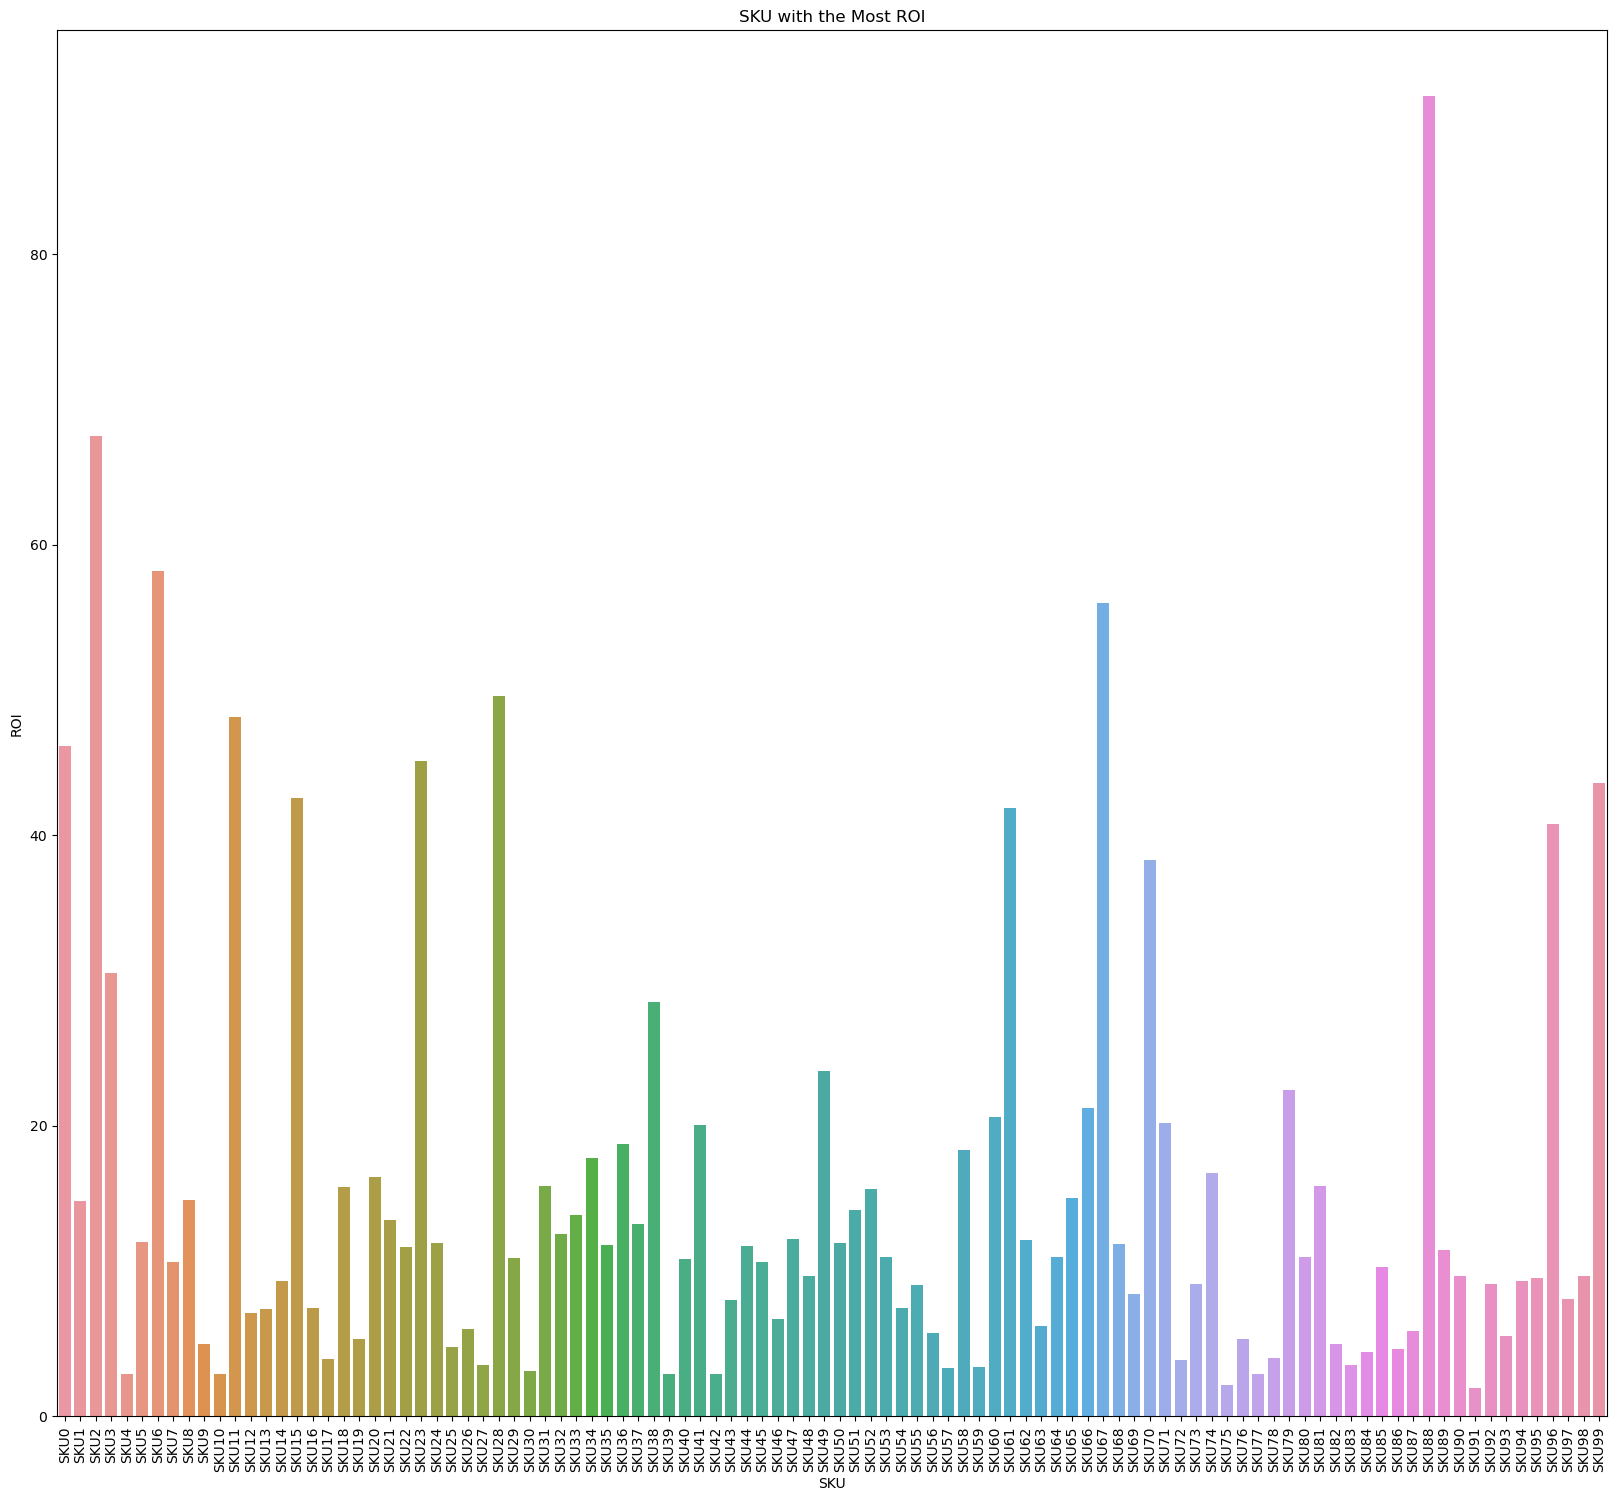

In [39]:
plt.figure(figsize=(20,18))
plt.title('SKU with the Most ROI')
plt.xticks(rotation=90)
sns.barplot(data=df,x='SKU',y='ROI');

### observation
#### SKU88 is the most product for ROI , and it's a cosmetics product

### getting a column for profit will help the business to identify what to increase and what to decrease in terms of products and transportation methods used
### so let's add a profit column 

### we gonna asume that costs column represents the production cost of products, so we will substract it from revenue to get the profit

In [44]:
df['Profit'] = df['Revenue']-df['Cost']
df.head()

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost,ROI,Profit
0,haircare,SKU0,69.808006,802,8661.996792,58,96,Carrier B,2.956572,Mumbai,0.226410,Road,187.752075,46.135292,8474.244717
1,skincare,SKU1,14.843523,736,7460.900065,53,37,Carrier A,9.716575,Mumbai,4.854068,Road,503.065579,14.830870,6957.834486
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282,67.486828,9435.829344
3,skincare,SKU3,61.163343,83,7766.836426,23,59,Carrier C,1.729569,Kolkata,4.746649,Rail,254.776159,30.484942,7512.060266
4,skincare,SKU4,4.805496,871,2686.505152,5,56,Carrier A,3.890548,Delhi,3.145580,Air,923.440632,2.909234,1763.064520


### it's time to ask the most important question 
### what's our most profitable product?

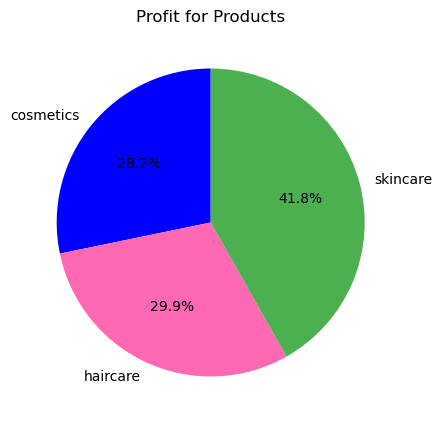

In [62]:
products_profit = df.groupby('Product type')['Profit'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.title('Profit for Products')
labels= products_profit['Product type']
colors = ["b", "hotpink","#4CAF50"]
plt.pie(products_profit['Profit'],labels=labels,colors=colors,startangle=90,autopct="%.1f%%")
plt.show()

### observation
#### skincare products is our most profitable product with 41.8% of our total profit
#### skincare products is our second most profitable product with 29.9% of our total profit
#### skincare products is our third and least profitable product with 28.2% of our total profit

### what's our most profitable transportation method?

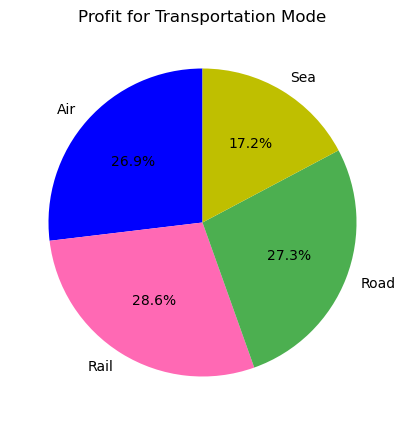

In [65]:
transportation_mode_profit = df.groupby('Transportation mode')['Profit'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.title('Profit for Transportation Mode')
labels=transportation_mode_profit['Transportation mode']
colors = ["b", "hotpink","#4CAF50","y"]
plt.pie(transportation_mode_profit['Profit'],labels=labels,colors=colors,startangle=90,autopct="%.1f%%")
plt.show()

### observation
#### rail way is our most profitable  transportation mode with 28.6% of our total profit
#### road way is our second most profitable transportation mode with 27.3% of our total profit
#### air way is our third most profitable transportation mode with 26.9% of our total profit
#### sea way is our least profitable transportation mode with 17.2% of our total profit

### now let's discover what SKU has the most profit for our company

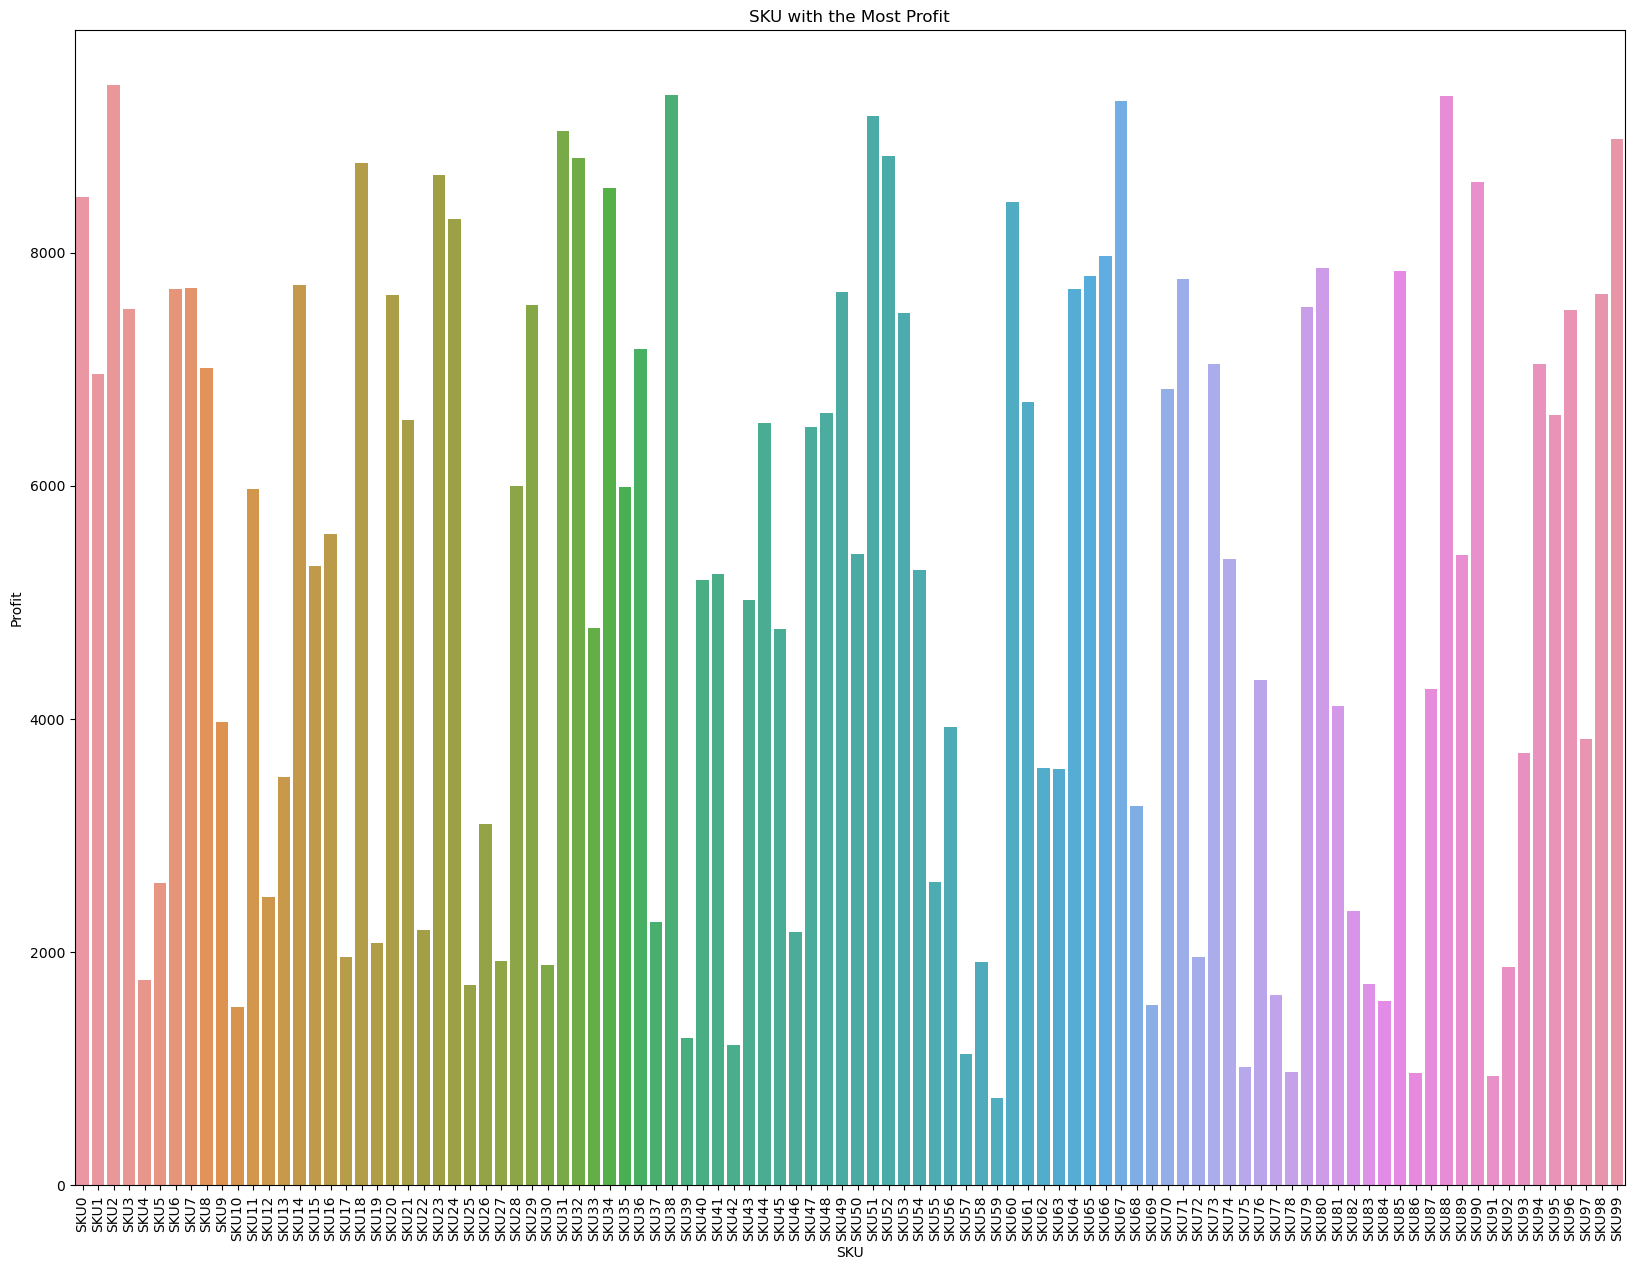

In [66]:
plt.figure(figsize=(20,15))
plt.title('SKU with the Most Profit')
plt.xticks(rotation=90)
sns.barplot(data=df,x='SKU',y='Profit');

In [67]:
df[df['SKU']=='SKU2']

,Product type,SKU,Price,Quantity sold,Revenue,Stock levels,Order quantities,Shipping carriers,Shipping cost,Location,Defect rate,Transportation mode,Cost,ROI,Profit
2,haircare,SKU2,11.319683,8,9577.749626,1,88,Carrier B,8.054479,Mumbai,4.580593,Air,141.920282,67.486828,9435.829344


### observation
#### our most profitable sku is "SKU2" ,it's a haircare product with 9435.82 for profit

### conclusions
#### 1- we must focus on skincare products as it's our most sellable and profitable products, also cosmetics products may be in need of a new marketing campaign to raise its reveneus
#### 2- in terms of shipping carriers "Carrier B" has the most revenues with 250095 , whilst our least revenues came from "Carrier A" with 142630
#### 3- in terms of transportation mode, rail way method provides the most revenues with 164990, also sea way provides the least revenues with just 97564
#### 4- in terms of defect rate per product, hair care products has the most defect rate , cosmetics has the least defect rate , that's a matter to investigate
#### 5- skincare products produced our highest numbers in terms of ROI with 609, whilst haircare products produced 495, cosmetics with 496, so increasing the supply of skincare products is essential for our business growth
#### 6- in terms of profit , skincare products has 41.8% of total profit that's a huge indicator of how we are specialized in these kind of products, haircare products with 29.6% of total profit,then cosmetics with 28.2%
#### 7- our most profitable transportation method is railway with 28.6 of total profit,roadway came second for profit with 27.3% of total profit,then airway came third with 26.9% of total, seaway wans't that profitable with just 17.2% of total profit